In [3]:
import tensorflow

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_ds = train_datagen.flow_from_directory(r'E:\lmsintern\dataset\dataset\train_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory(r'E:\lmsintern\dataset\dataset\test_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')


Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))
    

Epoch 1/20
149/149 [==============================] - 139s 906ms/step - loss: 1.2060 - accuracy: 0.4407 - val_loss: 1.0147 - val_accuracy: 0.6717
Epoch 2/20
149/149 [==============================] - 100s 658ms/step - loss: 0.9591 - accuracy: 0.6132 - val_loss: 0.8742 - val_accuracy: 0.6616
Epoch 3/20
149/149 [==============================] - 94s 630ms/step - loss: 0.8072 - accuracy: 0.6631 - val_loss: 0.8218 - val_accuracy: 0.7424
Epoch 4/20
149/149 [==============================] - 97s 653ms/step - loss: 0.7337 - accuracy: 0.6900 - val_loss: 0.7646 - val_accuracy: 0.7121
Epoch 5/20
149/149 [==============================] - 92s 622ms/step - loss: 0.6527 - accuracy: 0.7453 - val_loss: 1.0516 - val_accuracy: 0.5606
Epoch 6/20
149/149 [==============================] - 76s 507ms/step - loss: 0.6261 - accuracy: 0.7561 - val_loss: 0.6741 - val_accuracy: 0.7576
Epoch 7/20
149/149 [==============================] - 64s 427ms/step - loss: 0.5862 - accuracy: 0.7857 - val_loss: 0.5782 - val_

In [15]:
model.save('model.h5')

In [16]:
result = model.evaluate(test_ds)

40/40 [==============================] - 12s 309ms/step - loss: 0.7717 - accuracy: 0.7626


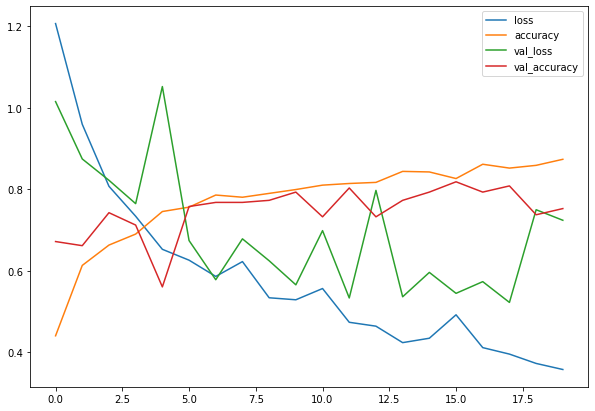

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [18]:
from keras.preprocessing import image

In [19]:
model = load_model('model.h5')

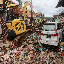

In [20]:
img = image.load_img(r"E:\lmsintern\dataset\dataset\test_set\Earthquake\1349.jpg", target_size = (64, 64))
img

In [21]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

1/1 [==============================] - 0s 254ms/step


array([1], dtype=int64)

In [22]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Earthquake', dtype='<U10')